In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Ames_Final_DF.csv")

# Separating the target and features variable

In [3]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

#Sets target variable (Sale Price) as y
#Sets feature variables (everything but Sale Price and Id) as X

# Train| Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Scaler Data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search CV

2. Ridge

In [6]:
from sklearn.linear_model import Ridge
Ridge_model =Ridge()
param_grid = {'alpha':[0.1,1,5,50,80,90,100,150,200,250]}

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
#verbose number a personal preference , verbose = increase the information during the process
grid_model = GridSearchCV(estimator = Ridge_model,param_grid=param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv=5,
                          verbose = 2)

In [10]:
grid_model.fit(X_train,y_train)
#fitting 5 folds for each 8 candidates
# 5 folds is from cv
# 8 candidates is from alpha

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................ alpha=0.1, total=   0.3s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 5, 50, 80, 90, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
grid_model.best_estimator_

Ridge(alpha=50)

In [12]:
grid_model.best_params_

{'alpha': 50}

In [13]:
grid_model.best_score_

-475678918.5584696

In [14]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.067324      0.092800         0.001394    7.892371e-04         0.1   
1       0.016591      0.002244         0.001001    1.861498e-06           1   
2       0.023313      0.002615         0.001797    1.166312e-03           5   
3       0.017791      0.001938         0.001200    4.007583e-04          50   
4       0.016591      0.001742         0.001001    1.007019e-06          80   
5       0.018390      0.002331         0.001000    6.572747e-07          90   
6       0.016036      0.001057         0.001001    7.478899e-07         100   
7       0.017591      0.002330         0.001399    4.900966e-04         150   
8       0.017790      0.002314         0.001000    1.055524e-06         200   
9       0.021389      0.009906         0.001000    9.956652e-07         250   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.1}      -6.052364e+08      -4.651889e+08      -5.293568e+08   
1    {'alpha': 1}      -6.033939e+08      -4.669174e+08      -5.283164e+08   
2    {'alpha': 5}      -6.011655e+08      -4.657427e+08      -5.267386e+08   
3   {'alpha': 50}      -5.951800e+08      -4.576386e+08      -5.327097e+08   
4   {'alpha': 80}      -5.944286e+08      -4.580285e+08      -5.377268e+08   
5   {'alpha': 90}      -5.944493e+08      -4.585295e+08      -5.393911e+08   
6  {'alpha': 100}      -5.945746e+08      -4.591560e+08      -5.410471e+08   
7  {'alpha': 150}      -5.964073e+08      -4.635503e+08      -5.492070e+08   
8  {'alpha': 200}      -5.996779e+08      -4.691870e+08      -5.572326e+08   
9  {'alpha': 250}      -6.039293e+08      -4.754879e+08      -5.651991e+08   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -5.028491e+08      -3.330385e+08    -4.871339e+08    8.967154e+07   
1      -4.985903e+08      -3.302994e+08    -4.855035e+08    8.981772e+07   
2      -4.892439e+08      -3.276606e+08    -4.821102e+08    8.982131e+07   
3      -4.620510e+08      -3.308153e+08    -4.756789e+08    8.835119e+07   
4      -4.556602e+08      -3.347928e+08    -4.761274e+08    8.776286e+07   
5      -4.542304e+08      -3.360626e+08    -4.765326e+08    8.764569e+07   
6      -4.530465e+08      -3.372995e+08    -4.770247e+08    8.756049e+07   
7      -4.497071e+08      -3.430321e+08    -4.803808e+08    8.750772e+07   
8      -4.490826e+08      -3.481723e+08    -4.846705e+08    8.789761e+07   
9      -4.500685e+08      -3.529033e+08    -4.895176e+08    8.858245e+07   

   rank_test_score  
0                9  
1                8  
2                6  
3                1  
4                2  
5                3  
6                4  
7                5  
8                7  
9               10

In [15]:
y_pred = grid_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

510363417.44329715

# RMSE

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [18]:
RMSE

22591.224345822808

In [19]:
df['SalePrice'].mean()

179875.34917355372

In [20]:
RMSE/df['SalePrice'].mean()*100

12.559377618789522

# Residual Plot

In [21]:
test_predictions=grid_model.predict(X_test)
test_res=y_test-test_predictions

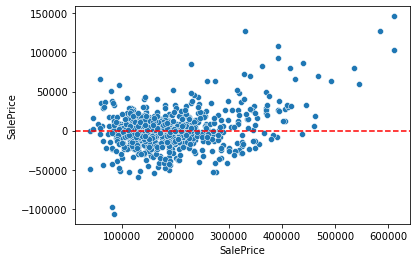

In [22]:
sns.scatterplot(x =y_test,y=test_res)
plt.axhline(y=0,color='r',linestyle ='--') 

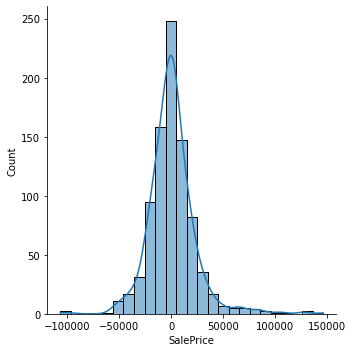

In [23]:
sns.displot(test_res,bins=25,kde=True)

# Probability plot

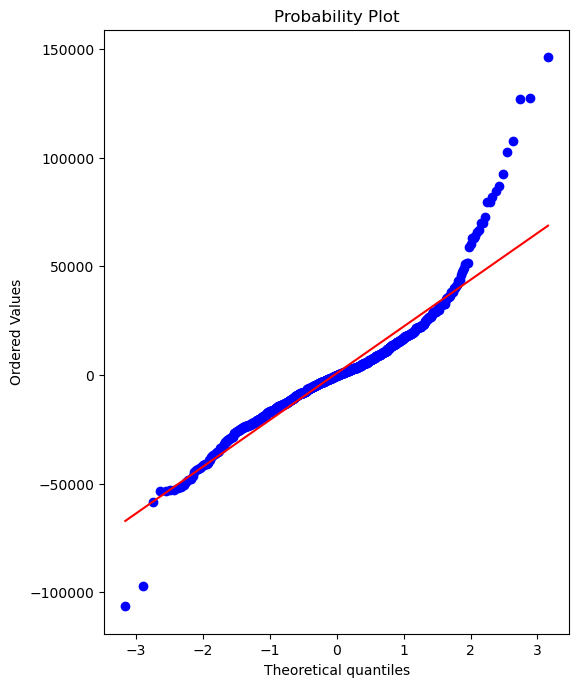

In [24]:
import scipy as sp

#create a figure and axis to plot on
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

#probplot returns the raw values if needed
#we just want to see the plot,so we assign these value to _
_ =sp.stats.probplot(test_res,plot=ax)